# **QSAR Model Building of MGMT Inhibitors**

# Read in data

In [1]:
import pandas as pd

In [2]:
dataset_url = 'https://raw.githubusercontent.com/HighScientist/Project-MGMT/main/AI/bioactivity_data_pIC50_pubchem_fp.csv'
dataset = pd.read_csv(dataset_url)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.522879
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.301030
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.045757
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.045757
4,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.744727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.368556
61,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.307153
62,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.261219
63,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.256490


In [3]:
X = dataset.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
61,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
62,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
63,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Y = dataset.iloc[:,-1]
Y

0     8.522879
1     8.301030
2     8.045757
3     8.045757
4     7.744727
        ...   
60    3.368556
61    3.307153
62    3.261219
63    3.256490
64    2.997402
Name: pIC50, Length: 65, dtype: float64

# Remove low variance features

In [5]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP12,PubchemFP19,PubchemFP20,PubchemFP33,PubchemFP43,PubchemFP143,PubchemFP145,PubchemFP146,PubchemFP150,...,PubchemFP689,PubchemFP690,PubchemFP691,PubchemFP698,PubchemFP700,PubchemFP701,PubchemFP702,PubchemFP708,PubchemFP709,PubchemFP710
0,0,0,0,0,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,1,1,1,1,...,0,1,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,1,1,1,1,1,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
61,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
62,1,1,1,1,0,0,1,1,1,0,...,1,1,0,1,1,1,0,1,1,1
63,0,0,0,0,0,0,1,1,1,0,...,1,0,0,1,0,0,0,1,1,1


In [6]:
X.to_csv('descriptor_list.csv', index = False)

In [7]:
# In the app, use the following to get this same descriptor list
# of 171 variables from the initial set of 881 variables
Xlist = list(pd.read_csv('descriptor_list.csv').columns)
X[Xlist]

,PubchemFP2,PubchemFP12,PubchemFP19,PubchemFP20,PubchemFP33,PubchemFP43,PubchemFP143,PubchemFP145,PubchemFP146,PubchemFP150,...,PubchemFP689,PubchemFP690,PubchemFP691,PubchemFP698,PubchemFP700,PubchemFP701,PubchemFP702,PubchemFP708,PubchemFP709,PubchemFP710
0,0,0,0,0,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,1,1,1,1,...,0,1,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,1,1,1,1,1,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
61,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
62,1,1,1,1,0,0,1,1,1,0,...,1,1,0,1,1,1,0,1,1,1
63,0,0,0,0,0,0,1,1,1,0,...,1,0,0,1,0,0,0,1,1,1


# Random Forest Regression Model

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.9410754318561454

## Model Prediction

In [10]:
Y_pred = model.predict(X)
Y_pred

array([7.91914207, 8.04851914, 7.57034643, 7.74984295, 7.47748476,
       7.07994077, 7.74166144, 7.36272084, 7.06000844, 7.2961048 ,
       7.2961048 , 6.70317607, 6.98305789, 7.10120529, 6.98305789,
       6.81176247, 6.97884594, 6.87522713, 6.67156564, 6.48763631,
       6.84072457, 6.35957704, 6.48763631, 6.67156564, 6.35846555,
       6.29147144, 5.84732992, 6.37688189, 6.48763631, 6.44046801,
       5.84732992, 6.35334708, 6.06022245, 5.96298325, 5.98680346,
       5.89969907, 5.732829  , 5.84732992, 5.48830947, 5.732829  ,
       6.19621247, 5.71495445, 5.53709306, 4.91552305, 5.05718404,
       5.27055416, 5.84732992, 4.89775551, 4.64124905, 4.78322025,
       5.43494289, 4.72736757, 4.90633396, 4.48230395, 4.25345257,
       5.35269638, 4.34575862, 3.68660107, 3.86949623, 3.72686271,
       3.75334111, 3.63534524, 3.96503549, 3.86949623, 3.57555287])

## Model Performance

In [11]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.11
Coefficient of determination (R^2): 0.94


# Data Visualization (Experimental vs Predicted pIC50 for Training Data)

In [12]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

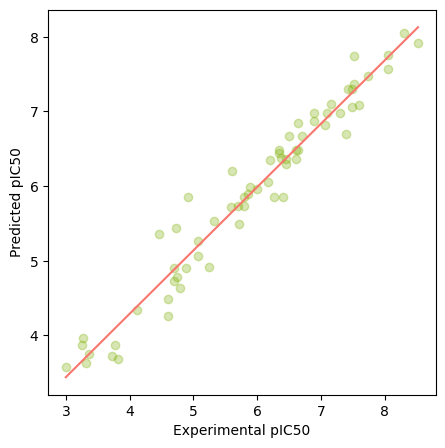

In [13]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

# Save Model as Pickle Object

In [14]:
import pickle

In [15]:
pickle.dump(model, open('MGMT_model.pkl', 'wb'))